In [3]:
"""
References:
- https://www.kaggle.com/code/agostontorok/soccer-world-cup-2018-winner/notebook
"""

'\nReferences:\n- https://www.kaggle.com/code/agostontorok/soccer-world-cup-2018-winner/notebook\n'

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split


In [5]:
match_df = pd.read_csv("data/international_matches.csv")
rank_df = pd.read_csv("data/fifa_ranking-2022-10-06.csv")
worldcup_schedule_df = pd.read_csv("data/matchs-schudule.csv", sep=";")
teams_df = pd.read_csv("data/Qatar2022-teams.csv", sep=";")

In [6]:
print("\n======================================== MATCHES DETAILS ========================================\n")
# print(match_df.tail())


print("\n======================================== COUNTRY RANKINGS ========================================\n")
print(rank_df.head())

print("\n======================================== WORLD CUP SCHEDULE ========================================\n")
print(worldcup_schedule_df.head())

print("\n======================================== WORLD CUP TEAMS AND GROUPS ========================================\n")
print(teams_df.head())

# Replace the country names to match with other datasets
match_df = match_df.replace({"IR Iran": "Iran", "Korea Republic" : "South Korea"})
rank_df = rank_df.replace({"IR Iran": "Iran", "Korea Republic" : "South Korea"})


======================================== MATCHES DETAILS ========================================


======================================== COUNTRY RANKINGS ========================================

   rank  country_full country_abrv  total_points  previous_points  \
0     1       Germany          GER          57.0              0.0   
1    96         Syria          SYR          11.0              0.0   
2    97  Burkina Faso          BFA          11.0              0.0   
3    99        Latvia          LVA          10.0              0.0   
4   100       Burundi          BDI          10.0              0.0   

   rank_change confederation   rank_date  
0            0          UEFA  1992-12-31  
1            0           AFC  1992-12-31  
2            0           CAF  1992-12-31  
3            0          UEFA  1992-12-31  
4            0           CAF  1992-12-31  

======================================== WORLD CUP SCHEDULE ========================================

   match        date co

In [7]:
match_df['rank_difference'] = match_df['home_team_fifa_rank'] - match_df['away_team_fifa_rank']
match_df['average_rank'] = (match_df['home_team_fifa_rank'] + match_df['away_team_fifa_rank'])/2
match_df['point_difference'] = match_df['home_team_total_fifa_points'] - match_df['away_team_total_fifa_points']
# match_df['offense_difference'] = match_df['home_team_mean_offense_score'] - match_df['away_team_mean_offense_score']
# match_df['defense_difference'] = match_df['home_team_mean_defense_score'] - match_df['away_team_mean_defense_score']
# match_df['goalkeeper_difference'] = match_df['home_team_goalkeeper_score'] - match_df['away_team_goalkeeper_score']
match_df['is_stake'] = match_df['tournament'] != 'Friendly'
match_df['is_worldcup'] = True
match_df = match_df[match_df['tournament'].str.contains("FIFA World Cup")]

match_df['score_difference'] = match_df['home_team_score'] - match_df['away_team_score'] # Note that this feature is not used in training

match_df['tournament'].value_counts()

def transform_match_outcome(result):
    result = int(result)
    if result > 0:
        return 1
    elif result < 0:
        return 0
    elif result == 0:
        return 0

match_df['match_outcome'] = match_df['score_difference'].map(transform_match_outcome)

# print(match_df['score_difference'])
# print(match_df['match_outcome'])
# match_df = match_df.fillna(0)
print("\n======================================== PROCESSED WORLD CUP MATCHES DATAFRAME ========================================\n")
# print(list(match_df))
# match_df['date'] = pd.to_datetime(match_df['date'])
# match_df = match_df[~(match_df['date'] < '2011-08-21')]
match_df


======================================== PROCESSED WORLD CUP MATCHES DATAFRAME ========================================



,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score,rank_difference,average_rank,point_difference,is_stake,is_worldcup,score_difference,match_outcome
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,NaN,NaN,NaN,37,40.5,0,True,True,2,1
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,NaN,NaN,NaN,-59,64.5,0,True,True,5,1
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,...,NaN,NaN,NaN,62,36.0,0,True,True,-2,0
5,1993-08-08,Peru,Colombia,South America,South America,70,19,0,0,0,...,NaN,NaN,NaN,51,44.5,0,True,True,-1,0
10,1993-08-15,Australia,Canada,Oceania,North America,52,46,0,0,2,...,NaN,NaN,NaN,6,49.0,0,True,True,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23634,2022-03-30,Solomon Islands,New Zealand,Oceania,Oceania,142,111,1072,1161,0,...,70.2,70.7,69.2,31,126.5,-89,True,True,-5,0
23654,2022-06-01,Scotland,Ukraine,Europe,Europe,39,27,1472,1535,1,...,74.8,78.7,80.0,12,33.0,-63,True,True,-2,0
23723,2022-06-05,Wales,Ukraine,Europe,Europe,18,27,1588,1535,1,...,74.8,78.7,80.0,-9,22.5,53,True,True,1,1
23876,2022-06-13,Australia,Peru,Oceania,South America,42,22,1462,1562,0,...,74.5,73.0,76.8,20,32.0,-100,True,True,0,0


In [8]:
### Building the train and test datasets

X, y = match_df.loc[:,['average_rank', 'rank_difference', 'point_difference', \
                        # 'offense_difference', 'defense_difference', 'goalkeeper_difference' \
                        ]], match_df['match_outcome']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=64)
X, y

(       average_rank  rank_difference  point_difference
 0              40.5               37                 0
 2              64.5              -59                 0
 4              36.0               62                 0
 5              44.5               51                 0
 10             49.0                6                 0
 ...             ...              ...               ...
 23634         126.5               31               -89
 23654          33.0               12               -63
 23723          22.5               -9                53
 23876          32.0               20              -100
 23890          66.0              -70               297
 
 [5960 rows x 3 columns],
 0        1
 2        1
 4        0
 5        0
 10       1
         ..
 23634    0
 23654    0
 23723    1
 23876    0
 23890    1
 Name: match_outcome, Length: 5960, dtype: int64)

In [9]:
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score
# import graphviz

def partition(x):
	"""
	Partition the column vector x into subsets indexed by its unique values (v1, ... vk)

	Returns a dictionary of the form
	{ v1: indices of x == v1,
	  v2: indices of x == v2,
	  ...
	  vk: indices of x == vk }, where [v1, ... vk] are all the unique values in the vector z.
	"""
	v = dict()
	for index, value in enumerate(x):
		if value not in v:
			v[value] = [index]
		else:
			v[value].append(index)
	return v

def entropy(y):
	"""
	Compute the entropy of a vector y by considering the counts of the unique values (v1, ... vk), in z

	Returns the entropy of z: H(z) = p(z=v1) log2(p(z=v1)) + ... + p(z=vk) log2(p(z=vk))
	"""
	entropy_val, total_val = 0, 0
	for value in y:
		total_val += len(y[value])
	for value in y:
		probability_val = len(y[value]) / total_val
		entropy_val -= probability_val * math.log2(probability_val)
	return entropy_val

def mutual_information(x, y):
	"""
	Compute the mutual information between a data column (x) and the labels (y). The data column is a single attribute
	over all the examples (n x 1). Mutual information is the difference between the entropy BEFORE the split set, and
	the weighted-average entropy of EACH possible split.

	Returns the mutual information: I(x, y) = H(y) - H(y | x)
	"""
	total_val = len(y)
	H_y = entropy(partition(y))	
	unique_vals = partition(x)
	H_yx = 0
	for key in unique_vals:
		classes, class_count = {}, 0
		for index in unique_vals[key]:
			class_count += 1
			if y[index] not in classes:
				classes[y[index]] = [index]
			else:
				classes[y[index]].append(index)
		H_yx += entropy(classes) * (class_count/total_val)
	I_xy = H_y - H_yx
	
	return I_xy

def id3(x, y, attribute_value_pairs=None, depth=0, max_depth=5):
	"""
	Implements the classical ID3 algorithm given training data (x), training labels (y) and an array of
	attribute-value pairs to consider. This is a recursive algorithm that depends on three termination conditions
		1. If the entire set of labels (y) is pure (all y = only 0 or only 1), then return that label
		2. If the set of attribute-value pairs is empty (there is nothing to split on), then return the most common
		   value of y (majority label)
		3. If the max_depth is reached (pre-pruning bias), then return the most common value of y (majority label)
	Otherwise the algorithm selects the next best attribute-value pair using INFORMATION GAIN as the splitting criterion
	and partitions the data set based on the values of that attribute before the next recursive call to ID3.

	The tree we learn is a BINARY tree, which means that every node has only two branches. The splitting criterion has
	to be chosen from among all possible attribute-value pairs. That is, for a problem with two features/attributes x1
	(taking values a, b, c) and x2 (taking values d, e), the initial attribute value pair list is a list of all pairs of
	attributes with their corresponding values:
	[(x1, a),
	 (x1, b),
	 (x1, c),
	 (x2, d),
	 (x2, e)]
	 If we select (x2, d) as the best attribute-value pair, then the new decision node becomes: [ (x2 == d)? ] and
	 the attribute-value pair (x2, d) is removed from the list of attribute_value_pairs.

	The tree is stored as a nested dictionary, where each entry is of the form
					(attribute_index, attribute_value, True/False): subtree
	* The (attribute_index, attribute_value) determines the splitting criterion of the current node. For example, (4, 2)
	indicates that we test if (x4 == 2) at the current node.
	* The subtree itself can be nested dictionary, or a single label (leaf node).
	* Leaf nodes are (majority) class labels

	Returns a decision tree represented as a nested dictionary, for example
	{(4, 1, False):
		{(0, 1, False):
			{(1, 1, False): 1,
			 (1, 1, True): 0},
		 (0, 1, True):
			{(1, 1, False): 0,
			 (1, 1, True): 1}},
	 (4, 1, True): 1}
	"""
	if attribute_value_pairs == None:
		attribute_value_pairs = []
		for i in range(len(x[0])):
			for key in partition(x[:,i]):
				attribute_value_pairs.append((i,key))
		
	new_depth = depth
	tree = dict()
	unique_elements = np.unique(y, return_counts=True)
	elements = unique_elements[0]
	counts = unique_elements[1]
	majority_label = elements[np.argmax(counts)]

	# Three termination conditions
	if len(elements) == 1:
		# 1. If the entire set of labels (y) is pure (all y = only 0 or only 1), then return that label
		return y[0]	
	elif attribute_value_pairs != None and len(attribute_value_pairs) == 0:
		# 2. If the set of attribute-value pairs is empty (there is nothing to split on), then return
		#    the most common value of y (majority label)
		return majority_label
	elif depth == max_depth:
		# 3. If the max_depth is reached (pre-pruning bias), then return the most common value of y (majority label)
		return majority_label
	else:
		# Continue with Recursion
		information_gain = []
		for (index,value) in attribute_value_pairs:
			information_gain.append(mutual_information(x[:,index] == value,y))

		# If we select (x2, d) as the best attribute-value pair, then the new decision node becomes: 
		# [ (x2 == d)? ] and the attribute-value pair (x2, d) is removed from the list of attribute_value_pairs.

		chosen_pair = attribute_value_pairs[np.argmax(information_gain)]
		best_index, best_value = chosen_pair

		new_pair = []
		for i in attribute_value_pairs:
			if i != chosen_pair:
				new_pair.append(i)

		attribute_value_pairs = new_pair

		# Custom broadcasting vector (x) with a scalar value (best_value) using numpy
		true_condition = x[:,best_index] == best_value
		false_condition = x[:,best_index] != best_value

		x_true, y_true, x_false, y_false = x[true_condition], y[true_condition], x[false_condition], y[false_condition]
		
		new_depth += 1

		if len(y_true):
			tree[best_index, best_value, True] = id3(x_true, y_true, attribute_value_pairs, depth=new_depth, max_depth=max_depth)
		
		if len(y_false):
			tree[best_index, best_value, False] = id3(x_false, y_false, attribute_value_pairs, depth=new_depth, max_depth=max_depth)
	
	return tree

def predict_example(x, tree):
	"""
	Predicts the classification label for a single example x using tree by recursively descending the tree until
	a label/leaf node is reached.

	Returns the predicted label of x according to tree
	"""
	try:
		for node in tree:
			attribute, value, truth_value = node
			if value == x[attribute] and truth_value == True:
				return predict_example(x, tree[node])
			elif value != x[attribute] and truth_value == False:
				return predict_example(x, tree[node])
	except TypeError as te:
		return tree

def compute_error(y_true, y_pred):
	"""
	Computes the average error between the true labels (y_true) and the predicted labels (y_pred)

	Returns the error = (1/n) * sum(y_true != y_pred)
	"""
	return (1/len(y_true)) * sum(y_true != y_pred)

In [10]:
ytrn = np.asarray(y_train.values.tolist())
Xtrn = np.asarray(X_train.values.tolist())

ytst = np.asarray(y_test.values.tolist())
Xtst = np.asarray(X_test.values.tolist())
# print(Xtrn, ytrn)

depths = 100
depth_accuracies = []
for depth in range(10, depths+1, 10):
	decision_tree = id3(Xtrn, ytrn, max_depth=depth+1)
	y_pred = [predict_example(x, decision_tree) for x in Xtst]
	tst_err = compute_error(ytst, y_pred)
	accuracy = (1 - tst_err) * 100
	print('Depth = ', depth)
	depth_accuracies.append(accuracy)
	print('Accuracy = {0:4.2f}%.\n'.format(accuracy), 2)

KeyboardInterrupt: 

In [42]:
depth_list = [x for x in range(10, 101, 10)]
depth_list, depth_accuracies

([10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
 [51.06263982102908,
  52.96420581655481,
  54.809843400447434,
  56.54362416107382,
  57.5503355704698,
  59.228187919463096,
  60.178970917225946,
  61.017897091722595,
  62.02460850111857,
  62.75167785234898])

In [43]:
depths = 200
new_depth_accuracies = []
for depth in range(100, depths+1, 10):
	decision_tree = id3(Xtrn, ytrn, max_depth=depth+1)
	y_pred = [predict_example(x, decision_tree) for x in Xtst]
	tst_err = compute_error(ytst, y_pred)
	accuracy = (1 - tst_err) * 100
	print('Depth = ', depth)
	new_depth_accuracies.append(accuracy)
	print('Accuracy = {0:4.2f}%.\n'.format(accuracy))

Depth =  100
Accuracy = 62.75%.

Depth =  110
Accuracy = 63.20%.

Depth =  120
Accuracy = 63.42%.

Depth =  130
Accuracy = 64.15%.

Depth =  140
Accuracy = 64.21%.

Depth =  150
Accuracy = 64.32%.

Depth =  160
Accuracy = 65.10%.

Depth =  170
Accuracy = 65.21%.

Depth =  180
Accuracy = 65.77%.

Depth =  190
Accuracy = 66.16%.

Depth =  200
Accuracy = 65.83%.



In [118]:
depth_list = [x for x in range(50,151,10)]
acc_custom_dt = depth_accuracies[4:] + new_depth_accuracies[1:6]

In [133]:
from sklearn.tree import DecisionTreeClassifier

# Test accuracies for custom decision trees depths 50 - 150
depth_list = [x for x in range(50,151,10)]
acc_custom_dt = depth_accuracies[4:] + new_depth_accuracies[1:6]

# Test accuracies for decision trees depths 50 - 150
sklearn_accuracies = []
for depth in range(50, 151, 10):
    decision_tree = DecisionTreeClassifier(max_depth=depth)
    decision_tree.fit(X_train, y_train)
    Y_pred = decision_tree.predict(X_test)
    acc_decision_tree = round(decision_tree.score(X_test, y_test) * 100, 2)
    sklearn_accuracies.append(acc_decision_tree)

depth_list = [x for x in range(50, 151, 10)]
acc_dt = sklearn_accuracies

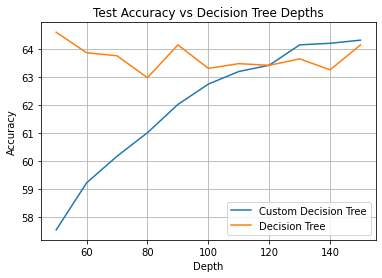

In [134]:
import matplotlib.pyplot as plt

plt.plot(depth_list, acc_custom_dt, label = 'Custom Decision Tree')
plt.plot(depth_list, acc_dt, label = 'Decision Tree')
plt.title('Test Accuracy vs Decision Tree Depths')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [123]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
model = logreg

# model = decision_tree


# let's define a small margin when we safer to predict draw then win
margin = 0

# let's define the rankings at the time of the World Cup
rank_df = rank_df.loc[(rank_df['rank_date'] == rank_df['rank_date'].max()) & (rank_df['country_full'].isin(teams_df['Team'].unique()))]

worldcup_rankings = rank_df.set_index(['country_full'])

opponents = ['First match \nagainst', 'Second match\n against', 'Third match\n against']

world_cup = teams_df.set_index(['Team'])
world_cup['points'] = 0
world_cup['total_prob'] = 0
world_cup['expected points'] = 0
world_cup['rank'] = None

country_win_prob = {}

for country in teams_df['Team'].unique():
    country_win_prob[country] = list()


# Group Stage Match Prediction


from itertools import combinations
import numpy as np

for group in sorted(set(teams_df['Group'])):
    print('___Starting group {}:___'.format(group))
    for home, away in combinations(teams_df.query('Group == "{}"'.format(group)).values, 2):
        print("{} vs. {}: ".format(home[0], away[0]), end='')
    
        home = home[0]
        away = away[0]
        
        # Create a row for each match
        row = pd.DataFrame(np.array([[np.nan, np.nan, np.nan]]), columns=X_train.columns)

        home_rank = worldcup_rankings.loc[home, 'rank']
        home_points = worldcup_rankings.loc[home, 'total_points']
        opp_rank = worldcup_rankings.loc[away, 'rank']
        opp_points = worldcup_rankings.loc[away, 'total_points']
        world_cup.loc[home, 'rank'] = home_rank
        world_cup.loc[away, 'rank'] = opp_rank

        row['average_rank'] = (home_rank + opp_rank) / 2
        row['rank_difference'] = home_rank - opp_rank
        row['point_difference'] = home_points - opp_points
        
        # Model Output
        home_win_prob = model.predict_proba(row)[:,1][0]
        
        
        
        # Saving Model Output
        world_cup.loc[home, 'total_prob'] += home_win_prob
        world_cup.loc[away, 'total_prob'] += 1-home_win_prob

        country_win_prob[home].append(home_win_prob)
        country_win_prob[away].append(1-home_win_prob)
        
        # Determining Win / Draw / Lose based on home_win_prob
        points = 0
        if home_win_prob <= 0.5 - margin:
            print("{} wins with {:.2f}".format(away, 1-home_win_prob))
            world_cup.loc[away, 'points'] += 3
            world_cup.loc[away, 'expected points'] += (1-home_win_prob) * 3
        if home_win_prob > 0.5 - margin:
            points = 1
        if home_win_prob >= 0.5 + margin:
            points = 3
            world_cup.loc[home, 'points'] += 3
            world_cup.loc[home, 'expected points'] += home_win_prob * 3
            print("{} wins with {:.2f}".format(home, home_win_prob))
        if points == 1:
            print("Draw")
            world_cup.loc[home, 'points'] += 1
            world_cup.loc[away, 'points'] += 1
            world_cup.loc[home, 'expected points'] += home_win_prob * 1
            world_cup.loc[away, 'expected points'] += (1-home_win_prob) * 1

# world_cup
##########################################################################################
# for group in set(teams_df['Group']):
#     print('___Starting group {}:___'.format(group))
#     teams = teams_df.query('Group == "{}"'.format(group)).values
#     for team_info in teams:
#         team_name = team_info[0]
#         print(team_name, ": ", world_cup.loc[team_name, "expected points"])


# # Group Stage Survival Probability
# 
# I calculated each country's probability to survive in Group Stage.
# 
# I assumed if a country has 2 or more wins, then they survive in Group Stage.

# In[119]:
##########################################################################################

team_group_map = {}
for team, group in zip(list(teams_df['Team']), list(teams_df['Group'])):
    team_group_map[team] = group

country_total_prob = []

for country in country_win_prob.keys():

    win_prob_list = country_win_prob[country]

    total_prob = 0
    temp = 1
    for i in range(3):
        temp = temp * win_prob_list[i]

    total_prob += temp

    for i in range(3):
        temp = 1
        for j in range(3):
            if i == j:
                temp = temp * (1 - win_prob_list[i])
            else:
                temp = temp * win_prob_list[i]
        total_prob += temp
    
    country_total_prob.append([country, total_prob, team_group_map[country]])
    
    # print(country, ":", total_prob)


country_total_prob = sorted(country_total_prob, key=lambda x: x[1], reverse=True)

country_total_prob.sort(key=lambda x:x[1], reverse=True)

# country_total_prob

prob_df = pd.DataFrame(country_total_prob, columns =['Country', 'Probability', 'Group']) 

# prob_df.plot(x="Country", y="Probability", kind="bar", figsize=(20,10))

# country_total_prob[:len(country_total_prob)//2], country_total_prob[len(country_total_prob)//2:]

___Starting group A:___
Senegal vs. Qatar: Senegal wins with 0.68
Senegal vs. Netherlands: Netherlands wins with 0.59
Senegal vs. Ecuador: Senegal wins with 0.64
Qatar vs. Netherlands: Netherlands wins with 0.76
Qatar vs. Ecuador: Ecuador wins with 0.56
Netherlands vs. Ecuador: Netherlands wins with 0.70
___Starting group B:___
Iran vs. England: England wins with 0.62
Iran vs. USA: USA wins with 0.55
Iran vs. Wales: Wales wins with 0.53
England vs. USA: England wins with 0.54
England vs. Wales: England wins with 0.57
USA vs. Wales: Wales wins with 0.50
___Starting group C:___
Argentina vs. Saudi Arabia: Argentina wins with 0.76
Argentina vs. Mexico: Argentina wins with 0.54
Argentina vs. Poland: Argentina wins with 0.62
Saudi Arabia vs. Mexico: Mexico wins with 0.74
Saudi Arabia vs. Poland: Poland wins with 0.67
Mexico vs. Poland: Mexico wins with 0.56
___Starting group D:___
Denmark vs. Tunisia: Denmark wins with 0.60
Denmark vs. France: France wins with 0.57
Denmark vs. Australia: De

In [124]:
round_of_16 = {}
for team, probability, group in country_total_prob:
    if group not in round_of_16:
        round_of_16[group] = [[team, probability, group]]
    elif len(round_of_16[group]) <= 1:
        round_of_16[group].append([team, probability, group])

# country_total_prob, round_of_16
# country_total_prob

def who_wins(home, away):
    winner = ['', 0]
    
    row = pd.DataFrame(np.array([[np.nan, np.nan, np.nan]]), columns=X_train.columns)

    home_rank = worldcup_rankings.loc[home, 'rank']
    home_points = worldcup_rankings.loc[home, 'total_points']
    opp_rank = worldcup_rankings.loc[away, 'rank']
    opp_points = worldcup_rankings.loc[away, 'total_points']
    world_cup.loc[home, 'rank'] = home_rank
    world_cup.loc[away, 'rank'] = opp_rank

    row['average_rank'] = (home_rank + opp_rank) / 2
    row['rank_difference'] = home_rank - opp_rank
    row['point_difference'] = home_points - opp_points

    # Model Output
    home_win_prob = model.predict_proba(row)[:,1][0]



    # Saving Model Output
    world_cup.loc[home, 'total_prob'] += home_win_prob
    world_cup.loc[away, 'total_prob'] += 1-home_win_prob

    country_win_prob[home].append(home_win_prob)
    country_win_prob[away].append(1-home_win_prob)

    # Determining Win / Draw / Lose based on home_win_prob
    points = 0
    if home_win_prob <= 0.5 - margin:
#         print("{} wins with {:.2f}".format(away, 1-home_win_prob))
        winner[0] = away
        winner[1] = 1-home_win_prob
        world_cup.loc[away, 'points'] += 3
        world_cup.loc[away, 'expected points'] += (1-home_win_prob) * 3
    if home_win_prob > 0.5 - margin:
        points = 1
    if home_win_prob >= 0.5 + margin:
        points = 3
        world_cup.loc[home, 'points'] += 3
        world_cup.loc[home, 'expected points'] += home_win_prob * 3
#       print("{} wins with {:.2f}".format(home, home_win_prob))
        winner[0] = home
        winner[1] = home_win_prob
    if points == 1:
#         print("Draw")
        world_cup.loc[home, 'points'] += 1
        world_cup.loc[away, 'points'] += 1
        world_cup.loc[home, 'expected points'] += home_win_prob * 1
        world_cup.loc[away, 'expected points'] += (1-home_win_prob) * 1
    return winner

quarter_finals = {}

for group in round_of_16:
#     print(round_of_16[group])
#     print(group, round_of_16[group])
#     print(group)
    winner1 = who_wins(round_of_16[group][0][0], round_of_16[group][1][0])
    winner2 = who_wins(round_of_16[group][1][0], round_of_16[group][0][0])
    
    quarter_finals[group] = winner1 if winner1[1] > winner2[1] else winner2

quarter_finals

{'A': ['Netherlands', 0.59242399653594],
 'F': ['Belgium', 0.5965162998414959],
 'G': ['Brazil', 0.6211832635333625],
 'D': ['France', 0.5693198027032847],
 'H': ['Portugal', 0.5597077337649234],
 'C': ['Argentina', 0.5945771925630925],
 'E': ['Spain', 0.5554085880310891],
 'B': ['England', 0.598738190288691]}

In [125]:
import collections

groupwise_quarterfinals = collections.OrderedDict(sorted(quarter_finals.items()))
groupwise_quarterfinals

grouping = {'A': 'C', 'B': 'D', 'E': 'G', 'F': 'H'}
quarter_finals

quarter_final_winners = []
semifinals = []

for group in groupwise_quarterfinals:
    if group in grouping:
#         print(groupwise_quarterfinals[group], groupwise_quarterfinals[grouping[group]])
        quarter_final_winners.append(groupwise_quarterfinals[group])
        winner1 = who_wins(groupwise_quarterfinals[group][0], groupwise_quarterfinals[grouping[group]][0])
        winner2 = who_wins(groupwise_quarterfinals[grouping[group]][0], groupwise_quarterfinals[group][0])

#         print(winner1, winner2)
        winner = winner1 if winner1[1] > winner2[1] else winner2
        semifinals.append(winner)
#     quarter_final_winners = []

semifinals

[['Argentina', 0.5631054591900231],
 ['France', 0.5369134867215077],
 ['Brazil', 0.5714958243323915],
 ['Belgium', 0.5776895072724745]]

In [126]:
semifinals
finals = []

for each_team in range(len(semifinals)//2):
#     print(semifinals[each_team], semifinals[each_team+2])
    winner1 = who_wins(semifinals[each_team][0], semifinals[each_team+2][0])
    winner2 = who_wins(semifinals[each_team+2][0], semifinals[each_team][0])
    winner = winner1 if winner1[1] > winner2[1] else winner2
    finals.append(winner)

finals

[['Brazil', 0.545260534051602], ['Belgium', 0.5445454143142667]]

In [127]:

winner1 = who_wins(finals[0][0], finals[1][0])
winner2 = who_wins(finals[1][0], finals[0][0])
world_cup_winner = winner1 if winner1[1] > winner2[1] else winner2

world_cup_winner

['Brazil', 0.5375114249131262]